<font face="Calibri" size="2"> <i>Open SAR Toolkit - Tutorial 2, version 1.0, September 2019. Andreas Vollrath, ESA/ESRIN phi-lab</i>
</font>

![title](auxiliary/header_image.PNG)

--------

# OST Tutorial II 
## How to access Sentinel-1 data with OST

--------

**Short description**

This notebook introduces you to OST's main class *Generic*, and its subclass *Sentinel-1*. The *Generic* class handles the basic structure of any OST batch processing project, while the *Sentinel1* class provides methods to search, refine and download sets of acquisitions.

- **I:** Get to know the *Generic* main class for setting up a OST Project
- **II:** Get to know the *Sentinel1* subclass, that features functions for data search and access

--------

**Requirements**

- a PC/Mac
- about 100MB of free disk space
- a Copernicus Open Data Hub user account, valid for at least 7 days (https://scihub.copernicus.eu)
--------

**NOTE:** all cells that have an * after its number can be executed without changing any code. 

### I-1* - Import python libraries necessary for processing

In [2]:
# this is the Generic class, that basically handles all the workflow from beginning to the end
from ost import Generic

### 2 - Data selection parameters

In order to define your project you need to define 3 main attributes. 

**1 Area of Interest:** 

In our case we only look for a *specific spot on earth*, that is defined by the *Latitude* and *Longitude*. In general, OST stores the AOI within the *s1Project class* as a *WKT* representation. You will see in later notebooks how you can also use your shapefiles or ISO3 country codes to define the extent of your AOI.

**2 Time of Interest:**

The time of interest is usually defined by a *start* and *end* date. The format should be conform with 'YYYY-MM-DD'. If none of the two parameters are defined, both parameters will use default values, which is the *2014-10-01* for *start*, and *today* for the end of the TOI.

**3 Project directory**

Here we set a high-level directory where all of the project-related data (i.e. inventory, download, processed files) will be stored or created. Note that it is also possible to customize the location of different sub-folders, e.g. separating the location of the download from the processing directory. 

**A word on paths**

OST handles strings and os.path objects (imported as join function on top).

In [3]:
#----------------------------
# Area of interest
#----------------------------

# Here we can either point to a shapefile, an ISO3 country code, or a WKT string
aoi = 'AUT'

#----------------------------
# Time of interest
#----------------------------
# we set only the start date to today - 30 days
start = '2019-06-01'
end = '2019-08-31'

#----------------------------
# Project folder
#----------------------------

# this imports we need to handle the folders, independent of the OS
import os
from os.path import join as opj
# get home folder
home = os.getenv('HOME')
# create a processing directory
project_dir = opj(home, 'Tutorial_2')

#------------------------------
# Print out AOI and start date
#------------------------------
print('AOI: ', aoi)
print('TOI start: ', start)
print('TOI end: ', end)
print('Project Directory: ', project_dir)

AOI:  AUT
TOI start:  2019-06-01
TOI end:  2019-08-31
Project Directory:  /home/jovyan/Tutorial_2


### I-2* - Initialize the *Generic* class

The above defined variables are used to initialize the class with its main attributes.

**Note** the data mount attribute. This is still experimental, but allows to access mounted data folders on the DIASes directly and supersedes the dwonload of the data. For now CreoDias and OndaDias are supported. The main entry point shuld be give, while the rest of the directory structure is handled by OST.

In [4]:
# create an OST Generic class instance
ost_generic = Generic(
    project_dir=project_dir,
    data_mount=None,
    aoi=aoi, 
    start=start, 
    end=end
)

# Uncomment below to see the list of folders inside the project directory (UNIX only):
print('')
print('We use the linux ls command for listing the directories inside our project folder:')
!ls {project_dir}


We use the linux ls command for listing the directories inside our project folder:
download  inventory  processing


### II-1* - The *Sentinel1* class

The *Sentinel1* class, as a subclass of the Generic class, inherts all the attributes and methods from the Generic class, and adds specific new ones for search and download of data.


In [5]:
# the import of the Sentinel1 class
from ost import Sentinel1

### II-2* Initialize the *Sentinel1* class

In addition to our attributes needed for the initialization of the *Generic* class, we add three more in order to define the type of Sentinel-1 data we are looking for:

- product_type: this can be either RAW, SLC, GRD or OCN
- the beam mode: this can be either IW, SM, EW or WV
- polarisation: This can be either VV, VH, HV, HH or a combination, e.g. VV, VH or HH, HV

Have a look at https://sentinel.esa.int/web/sentinel/user-guides/sentinel-1-sar/acquisition-modes for further information on Sentinel-1 acquisition modesa nd https://sentinel.esa.int/web/sentinel/missions/sentinel-1/observation-scenario for information of the observation scenario globally.

**NOTE** that we can use the asterisk for all of them (which is the default for all if not set).

In [6]:
# initialize the Sentinel1 class
ost_s1 = Sentinel1(
    project_dir=project_dir,
    data_mount=None,
    aoi=aoi, 
    start=start, 
    end=end,
    product_type='SLC',
    beam_mode='IW',
    polarisation='*'
)

### II-3* Searching for data


The search method of our *Sentinel1* class instance will trigger a search query on the scihub and get the results back in 2 ways: 

- write it into a shapefile (inside your inventory directory).
- store it as an instance attribute in form of a Geopandas GeoDataFrame that can be called by ost_s1.inventory

You will need a valid scihub account to do this step.
In case you do not have a scihub account yet, please go here to register: https://scihub.copernicus.eu/dhus/#/home

**IMPORTANT** OST actually queries the Copernicus Apihub (i.e. a different server), for which user credentials will be transfered only after a week of registration to the standard open scihub. So you may need to wait a couple of days after first registration before it works. For more info, go here: https://scihub.copernicus.eu/twiki/do/view/SciHubWebPortal/APIHubDescription

Populating the interactive namespace from numpy and matplotlib


 Your Copernicus Scihub Username: suprd
 Your Copernicus Scihub Password: ·········


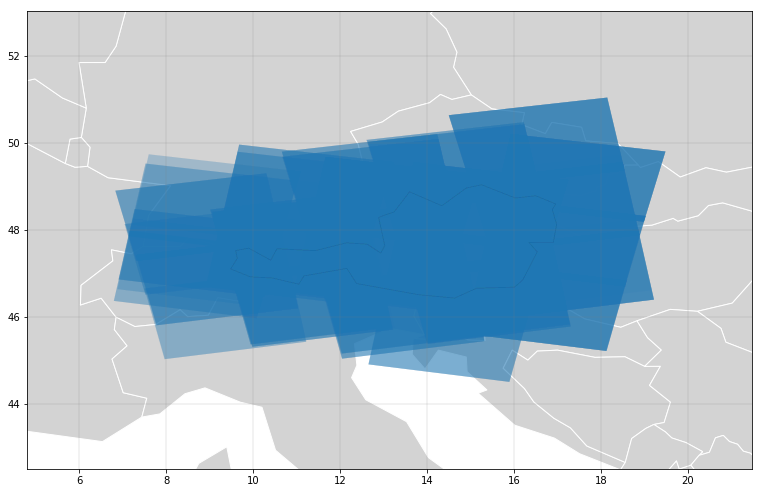

In [7]:
#---------------------------------------------------
# for plotting purposes we use this iPython magic
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (13, 13)
#---------------------------------------------------

# search command
ost_s1.search()

# we plot the full Inventory on a map
ost_s1.plot_inventory(transperancy=.1)

### II-4* The inventory attribute

The results of the search are stored in the inventory attribute of the class instance. This is actually a Geopandas Dataframe (http://geopandas.org)that stores all the available metadata from the scihub catalogue, and all pandas functionality can be applied for . 

In [8]:
print(' INFO: We found a total of {} products for our project definition'.format(len(ost_s1.inventory)))

# combine OST class attribute with pandas head command to print out the first 5 rows of the 
print('The columns of our inventory:')
print(ost_s1.inventory.columns)

print(' The last 5 rows of our inventory:')
print(ost_s1.inventory.tail(5))

 INFO: We found a total of 364 products for our project definition
The columns of our inventory:
Index(['id', 'identifier', 'polarisationmode', 'orbitdirection',
       'acquisitiondate', 'relativeorbit', 'orbitnumber', 'product_type',
       'slicenumber', 'size', 'beginposition', 'endposition',
       'lastrelativeorbitnumber', 'lastorbitnumber', 'uuid',
       'platformidentifier', 'missiondatatakeid', 'swathidentifier',
       'ingestiondate', 'sensoroperationalmode', 'geometry', 'download_path'],
      dtype='object')
 The last 5 rows of our inventory:
      id                                         identifier polarisationmode  \
359  360  S1A_IW_SLC__1SDV_20190601T170720_20190601T1707...            VV VH   
360  361  S1A_IW_SLC__1SDV_20190601T170655_20190601T1707...            VV VH   
361  362  S1B_IW_SLC__1SDV_20190601T050937_20190601T0510...            VV VH   
362  363  S1B_IW_SLC__1SDV_20190601T051002_20190601T0510...            VV VH   
363  364  S1B_IW_SLC__1SDV_20190601T

### II-5* Search Refinement

The results returned by the search algorithm on Copernicus scihub might not be 100% appropriate to what we are looking for. In this step we refine the results adressing possible issues and reduce later processing needs.

A first step **splits the data** by **orbit direction** (i.e. ascending and descending) and **polarization mode** (i.e. VV, VV/VH, HH, HH/HV). For each combination the routine then checks the coverage for the resulting combinations (e.g. descending VV/VH polarization). If one combination results in a non-full overlap to the AOI, all further steps are disregarded. In case a full coverage is possbile further refinement steps are taken: 

1. Some of the acquisition frames might have been processed and/or stored **more than once** in the ESA ground segment. Therefore they appear twice, with the scene identifier that only changes for the last 4 digits. It is necessary to identify those scenes in order to avoid redundancy. We therefore take the ones with the latest ingestion date to assure the use of the latest processor. 

2. Some of the scenes returned by the search query are actually **not overlapping the AOI**. This is because the search algorithm will actually check for data within a square defined by the outer bounds of the AOI geometry and not the AOI itself. The refinement only takes those frames overlapping with the AOI in order to reduce unnecassary processing later on.

3. In the case of **ascending tracks that cross the equator**, the **orbit number** of the frames will **increase by 1** even though they are practically from the same acquisition. During processing the frames need to be merged and the relative orbit numbers (i.e. tracks) should be the same. The metadata in the inventory is therefore updated in order to normalize the relative orbit number for the project.

4. (optional) The tracks of Sentinel-1 overlap to a certain degree. The data inventory might return tracks that only **marginally cross the AOI**, but there AOI overlap is already covered by the adjacent track. Thus, if tracks do not contribute to the overall overlap of the AOI, they are disregarded.

5. (optional) Some acquisitions might **not cross the entire AOI**. For the subsequent time-series/timescan processing this becomes problematic, since the generation of the time-series will only consider the overlapping region for all acquisitions per track.

6. A similar issue appears when one track **crosses the AOI twice**. In other words some of the frames in the middle of the track are not overlapping the AOI and are already disregarded by step 2. The assembling of the non-subsequent frames during processing would result in a failure. The metadata in the inventory is consequently updated, where the first part of the relative orbit number will be renamed to XXX.1, the second part to XXX.2 and so on. During processing those acquistions will be handled as 2 different tracks, and only merged during the final mosaicking.

7. (optional) A last step is needed to assure that for one mosaic in time that consists of different tracks, is only covered once by each track. 

In [9]:
ost_s1.refine()

### II-6* - Selecting the right data

The results of the refinement are stored in a new attribute called **refined_inventory_dict**.
This is a python dictionary with the mosaic keys as dictionary keys, whereas the respective items are the refined Geodataframes.

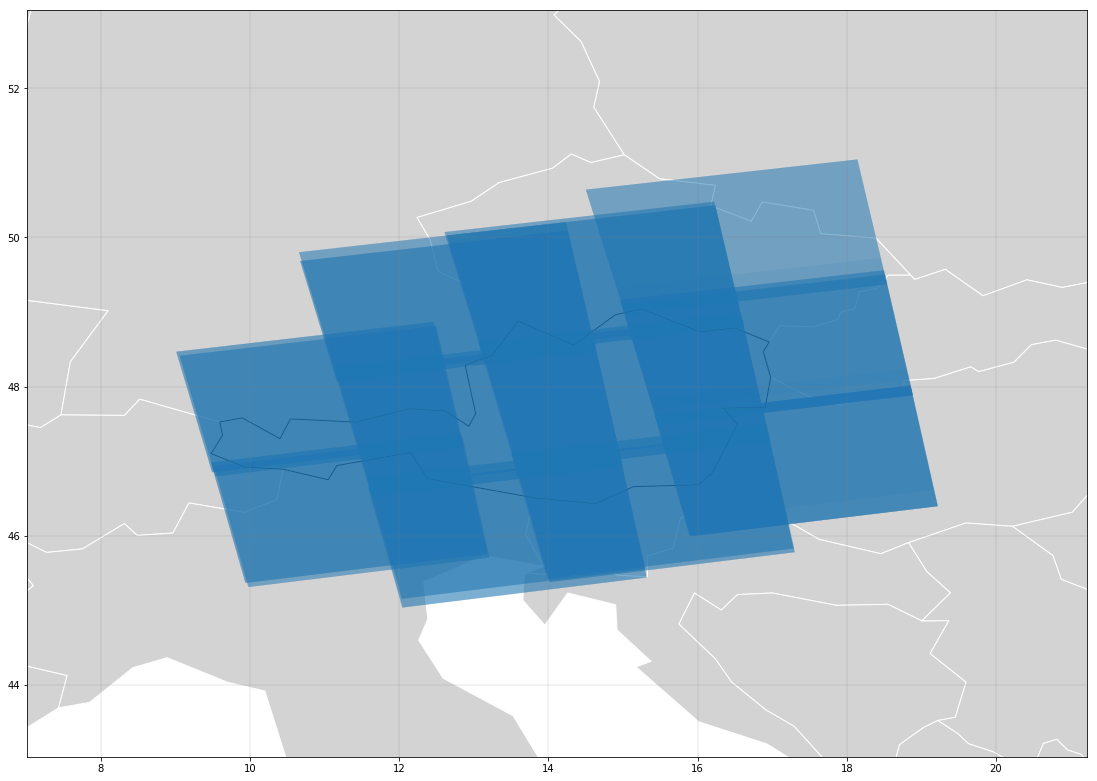

In [10]:
pylab.rcParams['figure.figsize'] = (19, 19)

key = 'ASCENDING_VVVH'
ost_s1.refined_inventory_dict[key]
ost_s1.plot_inventory(ost_s1.refined_inventory_dict[key], 0.1)

### II-7* Downloading the data

Now that we have a refined selection of the scenes we want to process, we can go on and download them. 
By executing the follwing cell, OST will ask you from which data portal you want to download.

#### ESA's Scihub catalogue
The main entry point is the offcial scihub catalogue from ESA. It is however limited to 2 concurrent donwloads at the same time. Also note that it recently became a rolling archive, so for historical data before June 2017, a special procedure has to applied that is not supported by OST at the moment. 

#### Alternative I - Alaska Satellite Facility:

A good alternative is the download mirror from the Alaska Satellite Facility, which provides the full archive of Sentinel-1 data. In order ot get registered, go on their data portal at https://vertex.daac.asf.alaska.edu and register. If you already have a NASA Earthdata account, make sure you signed the EULA's needed to access the Copernicus data. A good practice is to try a download directly from the vertex data protal, to assure everything works. 

#### Alternative 2 - PEPS server from CNES:

Another good alternative is the Peps server from the French Space Agency CNES. While it is also a rolling archive, copies of historic data are stored on tape and can be easily transferred to the online available storage. OST takes care of that automatically. You can register for an account here: https://peps.cnes.fr/rocket/

**NOTE** While for scihub there is a limit of 2 concurrent downloads, ASF and PEPS do not have such strict limits. For ASF the limit is 10, and we can set this with the keyword concurrent.

In [ ]:
ost_s1.download(ost_s1.refined_inventory_dict[key], concurrent=10)